# Análises Complementares - Integração ao SNT

Este notebook contém análises adicionais para entender melhor os padrões e características dos municípios em relação ao SNT.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Configurações de visualização
plt.style.use('seaborn')
sns.set_palette('Set2')
pd.set_option('display.max_columns', None)

/tmp/ipykernel_18112/1502375220.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [3]:
# Carregar os dados
df = pd.read_excel('analiseestatistica_indicadores2.xlsx')

## 1. Análise Regional
Vamos analisar como a integração ao SNT varia por estado e região

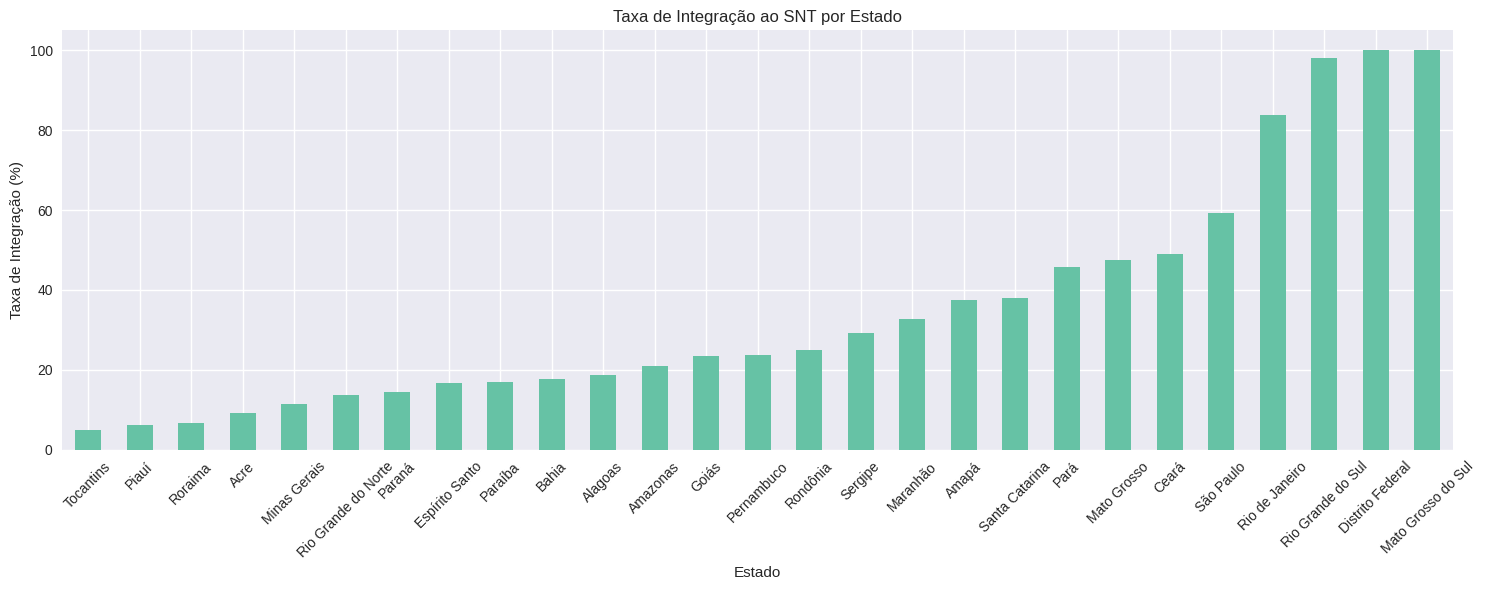

In [4]:
# Taxa de integração por estado
integracao_estado = df.groupby('Estado')['Integrado ao SNT'].value_counts(normalize=True).unstack()
integracao_estado['Taxa de Integração'] = integracao_estado['Sim'] * 100

plt.figure(figsize=(15, 6))
integracao_estado['Taxa de Integração'].sort_values().plot(kind='bar')
plt.title('Taxa de Integração ao SNT por Estado')
plt.xlabel('Estado')
plt.ylabel('Taxa de Integração (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 2. Análise por Porte do Município
Vamos categorizar os municípios por porte populacional e analisar padrões

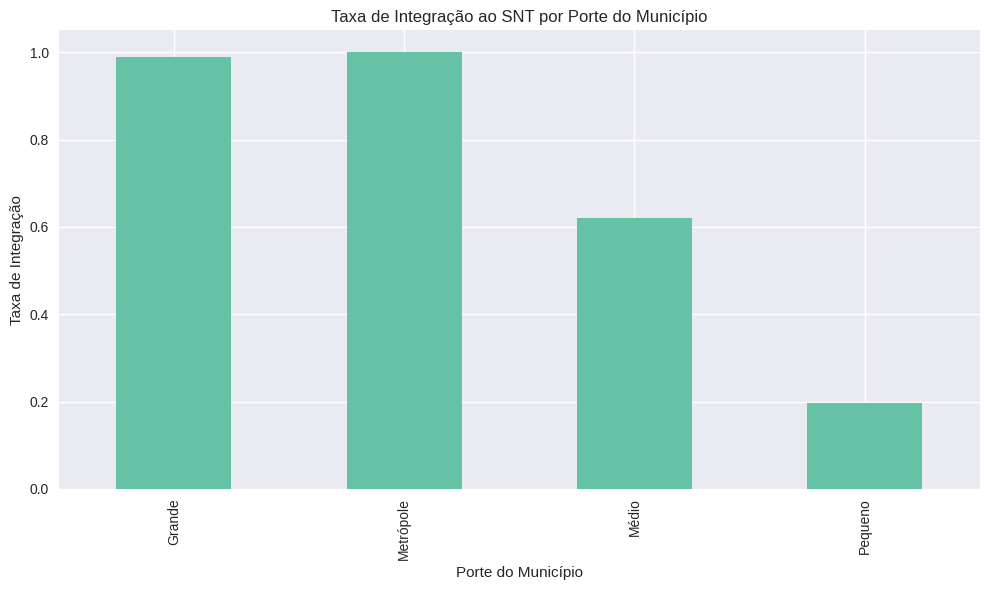


Distribuição dos municípios por porte:
Integrado ao SNT  Total Municípios    Sim
Porte                                    
Grande                         278  0.989
Metrópole                       41  1.000
Médio                         1391  0.620
Pequeno                       3860  0.196


In [5]:
# Criar categorias de porte do município
def categorizar_populacao(pop):
    if pop < 20000:
        return 'Pequeno'
    elif pop < 100000:
        return 'Médio'
    elif pop < 500000:
        return 'Grande'
    else:
        return 'Metrópole'

df['Porte'] = df['População'].apply(categorizar_populacao)

# Análise de integração por porte
porte_analise = df.groupby('Porte')['Integrado ao SNT'].value_counts(normalize=True).unstack()
porte_analise['Total Municípios'] = df.groupby('Porte').size()

plt.figure(figsize=(10, 6))
porte_analise['Sim'].plot(kind='bar')
plt.title('Taxa de Integração ao SNT por Porte do Município')
plt.xlabel('Porte do Município')
plt.ylabel('Taxa de Integração')
plt.tight_layout()
plt.show()

print("\nDistribuição dos municípios por porte:")
print(porte_analise[['Total Municípios', 'Sim']].round(3))

## 3. Análise de Clusters
Vamos identificar grupos naturais de municípios com características similares

In [7]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Selecionar features para clustering
cluster_features = ['PIB per capita', 'IDHM', 'Taxa de Óbitos/100 mil habitantes', 
                   'Tx de Alfabetização +15 anos', 'Taxa de Admissão em Empregos']

# Preparar dados
X_cluster = df[cluster_features].copy()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

# Aplicar K-means
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Analisar características dos clusters
cluster_stats = df.groupby('Cluster')[cluster_features + ['Integrado ao SNT']].agg([
    'mean', 'count'
]).round(2)

print("Características dos clusters:")
print(cluster_stats)

# Visualizar clusters
plt.figure(figsize=(10, 6))
for i in range(4):
    cluster_data = df[df['Cluster'] == i]
    plt.scatter(cluster_data['PIB per capita'], cluster_data['IDHM'], label=f'Cluster {i}')

plt.xlabel('PIB per capita')
plt.ylabel('IDHM')
plt.title('Clusters de Municípios')
plt.legend()
plt.show()

/home/fause/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


TypeError: Could not convert NãoSimNãoSimNãoSimNãoNãoSimSimNãoNãoSimSimNãoNãoSimNãoSimNãoNãoNãoNãoNãoSimNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoSimSimNãoSimNãoSimSimNãoSimNãoSimNãoNãoSimNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoSimNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoSimNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoSimSimNãoNãoNãoNãoNãoNãoSimNãoSimSimSimSimNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoSimNãoNãoNãoNãoNãoNãoNãoNãoNãoSimNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoSimNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoSimNãoSimSimNãoNãoSimNãoSimSimNãoSimSimNãoNãoSimNãoSimNãoSimNãoNãoNãoNãoNãoNãoSimSimNãoSimSimNãoNãoSimNãoNãoSimSimNãoNãoSimNãoNãoNãoNãoSimNãoSimNãoSimNãoSimNãoNãoNãoSimSimNãoNãoNãoNãoNãoSimSimSimNãoSimSimNãoNãoNãoSimSimNãoNãoNãoNãoNãoSimNãoNãoNãoSimNãoSimNãoNãoSimSimSimNãoSimNãoNãoNãoNãoNãoNãoSimSimSimNãoNãoSimNãoNãoSimSimNãoSimSimNãoSimSimNãoNãoNãoNãoSimNãoSimSimNãoSimNãoNãoSimSimNãoSimNãoSimNãoNãoNãoNãoNãoNãoSimSimNãoNãoSimSimSimSimNãoSimNãoNãoSimNãoNãoNãoNãoNãoNãoNãoSimSimNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoSimNãoNãoNãoNãoNãoNãoSimNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoSimNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoSimNãoNãoSimNãoSimNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoSimSimNãoSimNãoNãoNãoNãoSimNãoNãoSimNãoSimNãoNãoNãoNãoNãoNãoNãoNãoNãoSimNãoNãoNãoNãoNãoNãoNãoSimSimSimSimSimSimSimSimNãoSimSimSimSimSimSimSimSimSimSimSimSimSimSimSimSimSimSimSimSimSimSimSimSimSimSimSimSimSimSimSimSimSimSimSimSimSimSimSimSimSimSimSimSimSimSimSimSimSimSimSimSimSimSimSimSimSimSimSimSimSimSimSimSimSimSimSimSimSimSimSimSimSimSimSimSimSimSimSimSimSimSimSimSimSimSimSimSimSimSimSimSimSimSimSimSimNãoSimNãoSimSimNãoNãoNãoNãoNãoNãoNãoSimNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoSimNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoSimNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoSimNãoNãoSimNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoSimNãoNãoNãoNãoNãoNãoNão to numeric

## 4. Análise de Tendências Temporais
Vamos analisar a relação entre sinistros e integração ao SNT

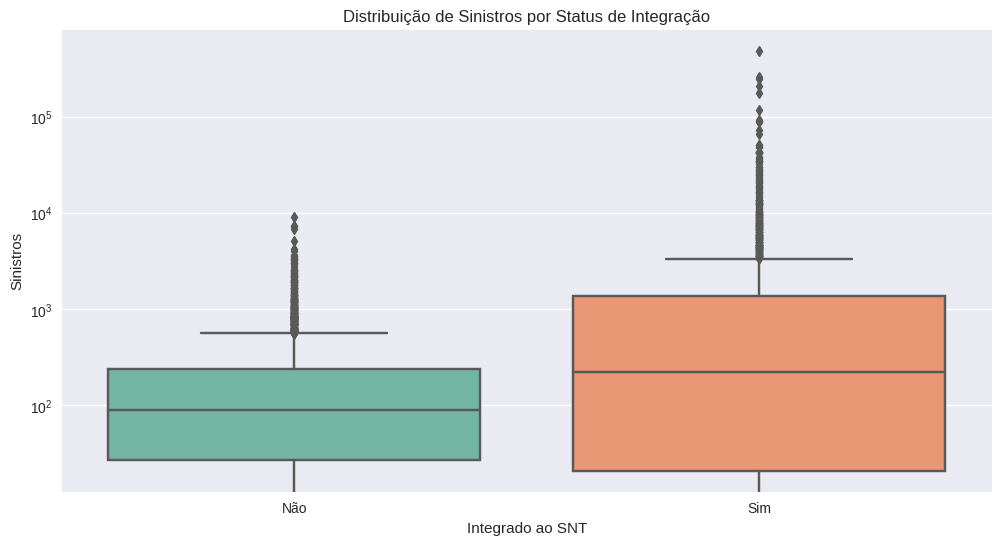


Estatísticas de sinistros:
Média de sinistros em municípios integrados: 2922.99
Média de sinistros em municípios não integrados: 228.79
p-valor do teste Mann-Whitney U: 0.0000


In [8]:
# Análise de sinistros vs integração
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Integrado ao SNT', y='Sinistros')
plt.title('Distribuição de Sinistros por Status de Integração')
plt.yscale('log')  # Usar escala logarítmica devido à grande variação
plt.show()

# Teste estatístico
integrados = df[df['Integrado ao SNT'] == 'Sim']['Sinistros']
nao_integrados = df[df['Integrado ao SNT'] == 'Não']['Sinistros']
stat, pvalue = stats.mannwhitneyu(integrados, nao_integrados)

print("\nEstatísticas de sinistros:")
print(f"Média de sinistros em municípios integrados: {integrados.mean():.2f}")
print(f"Média de sinistros em municípios não integrados: {nao_integrados.mean():.2f}")
print(f"p-valor do teste Mann-Whitney U: {pvalue:.4f}")

## 5. Análise de Eficiência
Vamos criar um índice de eficiência considerando múltiplos fatores

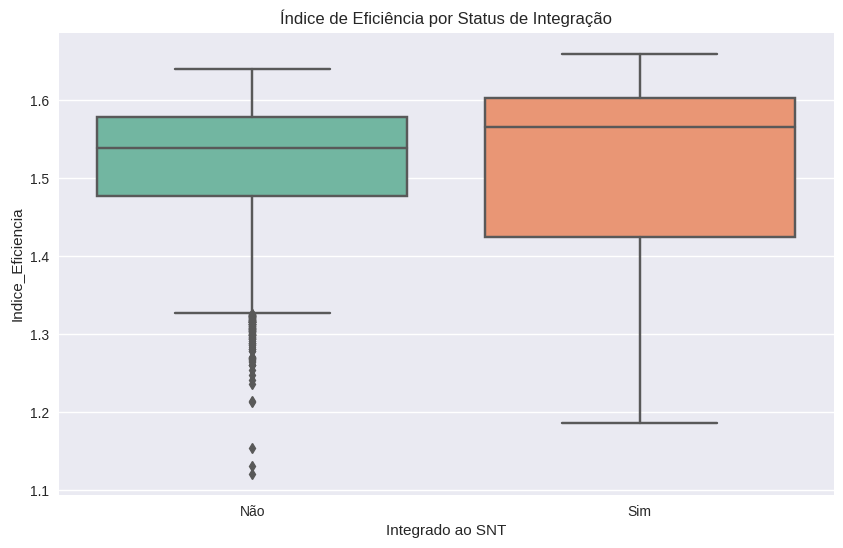


Top 10 municípios mais eficientes:
              Estado  Indice_Eficiencia Integrado ao SNT
3812       São Paulo           1.659729              Sim
3273       São Paulo           1.655090              Sim
4398  Santa Catarina           1.651860              Sim
4337  Santa Catarina           1.649924              Sim
3067    Minas Gerais           1.649424              Sim
3174  Espírito Santo           1.649117              Sim
4005          Paraná           1.647580              Sim
3809       São Paulo           1.646036              Sim
4566  Santa Catarina           1.645700              Sim
4120          Paraná           1.642810              Sim


In [9]:
# Criar índice de eficiência
df['Indice_Eficiencia'] = (
    (df['IDHM'] * 0.3) +
    (df['Tx de Alfabetização +15 anos'] * 0.3) +
    (1 - df['% de Óbitos/Sinistros']/100 * 0.2) +
    (df['Taxa de Admissão em Empregos'] * 0.2)
)

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Integrado ao SNT', y='Indice_Eficiencia')
plt.title('Índice de Eficiência por Status de Integração')
plt.show()

# Top 10 municípios mais eficientes
print("\nTop 10 municípios mais eficientes:")
top_10 = df.nlargest(10, 'Indice_Eficiencia')[['Estado', 'Indice_Eficiencia', 'Integrado ao SNT']]
print(top_10)

## Conclusões das Análises Complementares

1. **Análise Regional**:
   - Identificação de disparidades regionais na integração ao SNT
   - Possibilidade de compartilhar boas práticas entre estados

2. **Análise por Porte**:
   - Compreensão da relação entre tamanho do município e integração
   - Identificação de desafios específicos por porte

3. **Análise de Clusters**:
   - Identificação de grupos naturais de municípios
   - Possibilidade de estratégias específicas por cluster

4. **Análise de Tendências**:
   - Relação entre sinistros e integração
   - Impacto da integração na segurança viária

5. **Análise de Eficiência**:
   - Índice composto para avaliar desempenho geral
   - Identificação de casos de sucesso

### Recomendações
1. Desenvolver estratégias específicas por região e porte de município
2. Focar em municípios com alto potencial de integração (baseado nos clusters)
3. Usar casos de sucesso como referência para outros municípios
4. Considerar o índice de eficiência para priorização de ações